ChEn-3170: Computational Methods in Chemical Engineering Spring 2024 UMass Lowell; Prof. V. F. de Almeida **03Feb24**

# 04. Array Operations
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\vvec}{\boldsymbol{\mathsf{v}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc">
* [Objectives](#obj)
* [Formatting Output](#format)
   + `Numpy` `set_printoptions()` method
* [Vectors](#vectors)
   + [Element-by-element addition/subtraction](#vecaddsub)
   + [Element-by-element product/division](#vecproddiv)
   + [Self product](#vecselfprod)
   + [Inner product (dot product)](#vecinnerprod)
   + [Scaling (element-by-element multiplication/division by scalar)](#vecscale)
   + [Element-by-element mathematical operations](#vecops)
   + [Element-by-element search](#vecsearch)
   + [Zip vectors](#veczip)
* [Matrices](#matrices)
   + [Element-by-element addition/subtraction](#mataddsub)
   + [Element-by-element product/division](#matproddiv)
   + [Scaling (element-by-element multiplication/division by scalar)](#matscale)
   + [Element-by-element mathematical operations](#matops)
   + [Transposition](#mattransp)
     - `Numpy` `set_printoptions()` method
   + [Element-by-element search](#matsearch)
---

## [Objectives](#toc)<a id="obj"></a>

 + Cover basic array operations in 1-D (vectors) and 2-D (matrices) needed throughout the course.

In [1]:
'''Python packages are accessed with an import directive as such:'''

import numpy as np  # import the package and create the alias: np

## [Formatting Output](#toc)<a id="format"></a>

* Scientific notation

In [2]:
import math

pi = math.pi

print('pi = %15.5e'%pi) # formatting numeric output: scientific notation

pi =     3.14159e+00


In [3]:
print('pi = %10.5f'%pi) # formatting numeric output: float

pi =    3.14159


In [4]:
print('pi = %10.5e and e = %8.3f'%(pi, math.e)) # formatting numeric output: sci. notation and float

pi = 3.14159e+00 and e =    2.718


* `Numpy` arrays

In [5]:
'''Use set print options in Numpy'''

np.set_printoptions(precision=4, threshold=800, edgeitems=6, linewidth=105)

mtrx = np.random.random((10,100))

print(mtrx)

[[0.4343 0.262  0.0749 0.8064 0.0413 0.8379 ... 0.333  0.9393 0.4324 0.4096 0.8237 0.37  ]
 [0.7377 0.6443 0.828  0.4261 0.3173 0.5262 ... 0.7319 0.8887 0.0503 0.4553 0.1264 0.9607]
 [0.7872 0.6324 0.0732 0.6082 0.4056 0.0655 ... 0.1773 0.9021 0.4645 0.8589 0.8842 0.3531]
 [0.9488 0.131  0.3955 0.7646 0.0253 0.7284 ... 0.3143 0.9374 0.7703 0.2997 0.3678 0.6881]
 [0.6808 0.0562 0.7727 0.749  0.3542 0.8913 ... 0.5933 0.9965 0.0263 0.8561 0.5081 0.2376]
 [0.9821 0.2091 0.6252 0.9446 0.9159 0.1844 ... 0.8815 0.5501 0.9656 0.9763 0.6021 0.5802]
 [0.7044 0.1562 0.4998 0.6212 0.0014 0.4019 ... 0.5006 0.1557 0.9339 0.9012 0.1549 0.7359]
 [0.2022 0.2859 0.1782 0.8987 0.924  0.2202 ... 0.2934 0.6501 0.4027 0.5195 0.3381 0.2632]
 [0.336  0.5187 0.7651 0.3737 0.7348 0.2057 ... 0.2887 0.1747 0.8    0.3514 0.8698 0.6445]
 [0.3158 0.9022 0.7111 0.2699 0.2944 0.0887 ... 0.7159 0.0955 0.4677 0.2007 0.5598 0.7138]]


In [6]:
#help(np.set_printoptions)

## [Vectors](#toc)<a id="vectors"></a>

**In all of engineering calculations use double-precision floating point numeric**

In [7]:
'''Set double precision at creation time'''

x_vec = np.empty(10, dtype=np.float64)

print(type(x_vec))
print(x_vec.dtype)

<class 'numpy.ndarray'>
float64


In [8]:
'''Set double precision after creation'''

x_vec = x_vec.astype(float)
print(type(x_vec))
print(x_vec.dtype)

<class 'numpy.ndarray'>
float64


In [9]:
'''Set single precision after creation; not to be used'''

x_vec = x_vec.astype(np.float32)
print(type(x_vec))
print(x_vec.dtype)

<class 'numpy.ndarray'>
float32


#### [Element-by-element addition/subtraction](#toc)<a id="vecaddsub"></a>

In [10]:
'''Element-by-element addition or subtraction'''

vec1 = np.array(np.random.random(5))
print('vec1     =',vec1)

vec2 = np.array(np.random.random(5))
print('vec2     =',vec2)

result = vec1 + vec2         # element-by-element sum
print('addition   =',result)

result = vec1 - vec2         # element-by-element subtraction
print('difference =',result)

vec1     = [0.3179 0.9049 0.3632 0.0746 0.2641]
vec2     = [0.0024 0.6734 0.9536 0.8657 0.2895]
addition   = [0.3203 1.5784 1.3168 0.9403 0.5536]
difference = [ 0.3155  0.2315 -0.5905 -0.7911 -0.0254]


#### [Element-by-element product/division](#toc)<a id="vecproddiv"></a>

In [11]:
'''Element-by-element product or division'''

vec1 = np.array(np.random.random(5))
print('vec1    =',vec1)

vec2 = np.array(np.random.random(5))
print('vec2    =',vec2)

result = vec1 * vec2        # element-by-element product
print('product  =',result)

result = vec1 / vec2        # element-by-element division
print('division =',result)

vec1    = [0.9919 0.1353 0.484  0.5109 0.0196]
vec2    = [0.7355 0.5478 0.2632 0.0472 0.0573]
product  = [0.7296 0.0741 0.1274 0.0241 0.0011]
division = [ 1.3485  0.247   1.8387 10.8362  0.3423]


#### [Self product](#toc)<a id="vecselfprod"></a>

In [12]:
'''Product of all elements of a vector'''

vec1_prod = np.prod(vec1)

print('vec1         =', vec1)
print('vec1 product =', vec1_prod)

vec1         = [0.9919 0.1353 0.484  0.5109 0.0196]
vec1 product = 0.0006505343546965147


#### [Inner product (dot product)](#toc)<a id="vecinnerprod"></a>

The result of the inner product of two vectors: $\vvec_1 \cdot \vvec_2$ is a scalar.

In [13]:
'''Vector inner product or dot product'''

vec1 = np.array(np.random.random(5))
print('vec1           =',vec1)

vec2 = np.array(np.random.random(5))
print('vec2           =',vec2)

result = np.dot(vec1, vec2)     # inner or dot product
print('dot product =',result)

vec1           = [0.1909 0.1252 0.7449 0.9669 0.3684]
vec2           = [0.4338 0.233  0.1072 0.8745 0.3882]
dot product = 1.1804266640231722


In [14]:
'''More on vector inner product or dot product'''
'''Another way to compute the inner product'''

ele_by_ele_product = vec1 * vec2

inner_product = ele_by_ele_product.sum()

print('vec1 . vec2 = ', inner_product)

vec1 . vec2 =  1.180426664023172


#### [Scaling (element-by-element multiplication/division by a scalar)](#toc)<a id="vecscale"></a>

In [15]:
'''Scaling of a vector'''

vec = np.array(np.random.random(5))
print('vec    =',vec)

factor = 0.345
scaled = factor * vec     # scaling of vec element-by-element product
print('scaled =', scaled) # assigned to new variable `scaled`

vec *= factor          # in-place scaling
print('vec    =',vec)

vec    = [0.5766 0.5972 0.6994 0.1636 0.8731]
scaled = [0.1989 0.206  0.2413 0.0564 0.3012]
vec    = [0.1989 0.206  0.2413 0.0564 0.3012]


#### [Element-by-element mathematical operations](#toc)<a id="vecops"></a>

In [16]:
'''Mathematical Operations on a Vector'''

vec = np.array(np.random.random(5))
print('vec      =',vec)

log_vec = np.log(vec)         # natural log element-by-element
print('log(vec) =',log_vec)

exp_vec = np.exp(log_vec)     # exponential
print('exp(vec) =',exp_vec)

sin_vec = np.sin(vec)         # sine
print('sin(vec) =',sin_vec)

vec_cubed = vec**3            # powers
print('vec^3    =',vec_cubed)

vec_mean = vec.mean()         # arithmetic mean
print('mean(vec) =',vec_mean)

vec_std = vec.std()           # standard deviation
print('std(vec) =',vec_std)

vec      = [0.6781 0.4084 0.4572 0.7238 0.0812]
log(vec) = [-0.3885 -0.8956 -0.7827 -0.3233 -2.5109]
exp(vec) = [0.6781 0.4084 0.4572 0.7238 0.0812]
sin(vec) = [0.6273 0.3971 0.4414 0.6622 0.0811]
vec^3    = [0.3117 0.0681 0.0955 0.3792 0.0005]
mean(vec) = 0.469710942483759
std(vec) = 0.22927282917262876


#### [Element-by-element search](#toc)<a id="vecsearch"></a>

In [17]:
'''Searching a vector for entries matching a test'''

# what are the indices of the values in "vec" that satisfy: vec[] >= 0.3
(idx_ids, ) = np.where(vec >= 0.3) 

print('vec =', vec)
print('indices = ', idx_ids)

vec = [0.6781 0.4084 0.4572 0.7238 0.0812]
indices =  [0 1 2 3]


In [18]:
'''Searching a vector for entries matching a test'''

# what are the indices of the values in "vec" that satisfy: vec[] == 0.3
(idx_ids, ) = np.where(vec == 0.3) 

print('vec =', vec)
print('indices = ', idx_ids)

vec = [0.6781 0.4084 0.4572 0.7238 0.0812]
indices =  []


#### [Zip vectors](#toc)<a id="veczip"></a>

In [19]:
'''Zip creates a list of tuples on the fly'''

print(list(zip(vec1, vec2)))

[(0.1909422152259943, 0.43381634892334686), (0.12515542466154406, 0.2330038742794044), (0.744864163312392, 0.10723000213963774), (0.9669137978902241, 0.8745143971128343), (0.36835954873574495, 0.3881514356508913)]


## [Matrices](#toc)<a id="matrices"></a>

**In all of engineering calculations use double-precision floating point numeric**

In [20]:
'''Set double precision at creation time'''

mtrx = np.empty((5,5), dtype=np.float64)

print(type(mtrx))
print(mtrx.dtype)

<class 'numpy.ndarray'>
float64


In [21]:
'''Set double precision after creation'''

mtrx = mtrx.astype(float)

print(type(mtrx))
print(mtrx.dtype)

<class 'numpy.ndarray'>
float64


#### [Element-by-element addition/subtraction](#toc)<a id="mataddsub"></a>

In [22]:
'''Element-by-element addition or subtraction'''

mat1 = np.random.random((3,3))
print('mat1       =\n', mat1)

mat2 = np.random.random((3,3))
print('mat2       =\n', mat2)

result = mat1 + mat2              # element-by-element sum
print('addition   =\n', result)

result = mat1 - mat2              # element-by-element subtraction
print('difference =\n', result)

mat1       =
 [[0.7641 0.1676 0.1593]
 [0.6815 0.4079 0.8721]
 [0.6596 0.1705 0.145 ]]
mat2       =
 [[0.9634 0.6107 0.61  ]
 [0.3008 0.1083 0.1482]
 [0.5471 0.0457 0.9012]]
addition   =
 [[1.7275 0.7783 0.7693]
 [0.9823 0.5162 1.0202]
 [1.2067 0.2162 1.0462]]
difference =
 [[-0.1992 -0.4432 -0.4508]
 [ 0.3807  0.2996  0.7239]
 [ 0.1125  0.1248 -0.7562]]


#### [Element-by-element product/division](#toc)<a id="matproddiv"></a>

In [23]:
'''Element-by-element product or division'''

mat1 = np.random.random((3,3))
print('mat1     =\n', mat1)

mat2 = np.random.random((3,3))
print('mat2     =\n', mat2)

result = mat1 * mat2          # element-by-element product
print('product  =\n', result)

result = mat1 / mat2          # element-by-element division (cross your fingers)
print('division =\n', result)

mat1     =
 [[0.2319 0.0506 0.8874]
 [0.1758 0.4105 0.6654]
 [0.46   0.0551 0.8849]]
mat2     =
 [[5.5098e-01 3.3186e-01 7.3127e-01]
 [1.9758e-01 3.4737e-01 4.9032e-01]
 [9.0645e-01 3.9007e-02 4.9644e-04]]
product  =
 [[1.2778e-01 1.6783e-02 6.4891e-01]
 [3.4732e-02 1.4261e-01 3.2625e-01]
 [4.1700e-01 2.1485e-03 4.3929e-04]]
division =
 [[4.2089e-01 1.5239e-01 1.2135e+00]
 [8.8973e-01 1.1819e+00 1.3570e+00]
 [5.0752e-01 1.4121e+00 1.7825e+03]]


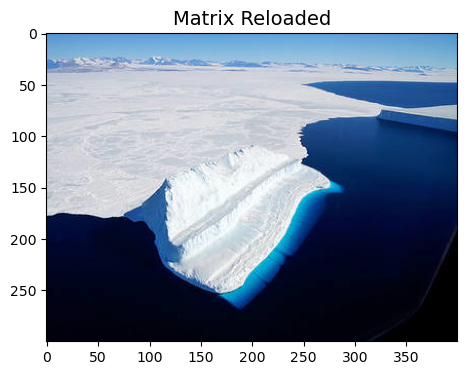

block shape = (300, 400, 3)


In [24]:
'''Produce Noise on a Matrix Image (brick data)'''

from matplotlib import pyplot as plt     # import the pyplot function of the matplotlib package
#%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 4] # extend the figure size on screen output

# Read image from the images/ directory in the chen-3170 repo
block = plt.imread('images/glacier.png', format='png')
#block = plt.imread('https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/cp21.8-T.png', format='png')


plt.figure(1)
plt.imshow(block)
plt.title('Matrix Reloaded', fontsize=14)
plt.show()
print('block shape =', block.shape)  # inspect the array shape

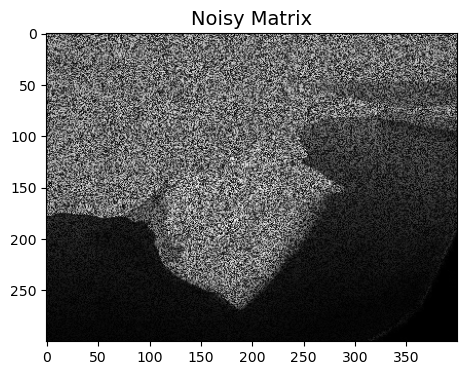

In [25]:
'''Use Matrix Element-by-Element Multiplication'''

mtrx_shape = block.shape[0:2]         # use the shape to automate noise_mtrx generation

noise_mtrx = np.random.random(mtrx_shape)   # generate random matrix

mtrx_noise = block[:,:,2] * noise_mtrx   # apply noise to the blue channel

plt.figure(2)
plt.imshow(mtrx_noise, cmap='gray')
plt.title('Noisy Matrix',fontsize=14)
plt.show()

In [26]:
'''Matrix Scaling (matrix product or division by a scalar)'''

mat1 = np.random.random((3,3))
print('mat1      =\n',mat1)

factor = 3.21
result = factor * mat1        # scaling of mat1 element-by-element; product with factor
print('scaled   =\n',result)

mat1      =
 [[0.6956 0.4987 0.6299]
 [0.7699 0.2315 0.3932]
 [0.5718 0.3641 0.9632]]
scaled   =
 [[2.2329 1.6009 2.022 ]
 [2.4714 0.7431 1.2621]
 [1.8354 1.1688 3.0918]]


#### [Scaling (element-by-element multiplication/division by a scalar)](#toc)<a id="matscale"></a>

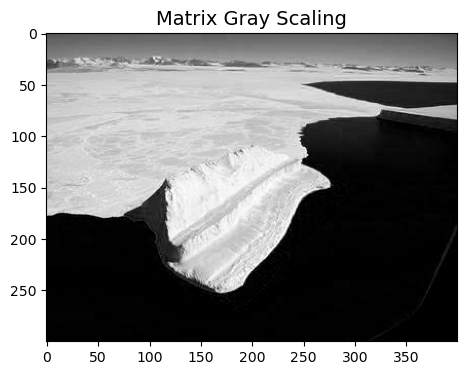

In [27]:
'''Matrix Scaling of an Image'''

color_channel = np.copy(block[:,:,0])   # copy the red channel

color_channel /= color_channel.max()    # scale to gray, 0-255 values
color_channel *= 255
gray_channel  = color_channel.astype(int) # truncate all float data type to int

plt.figure(3)
plt.imshow(gray_channel, cmap='gray')
#plt.imshow(gray_channel)

plt.title('Matrix Gray Scaling',fontsize=14)
plt.show()

#### [Element-by-element mathematical operations](#toc)<a id="matops"></a>

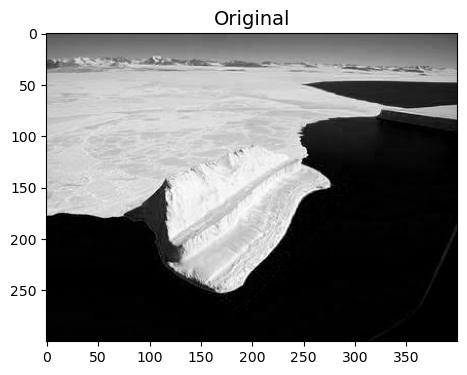

mean(mtrx) = 0.38594216
std(mtrx) = 0.37984067


In [28]:
'''Other Mathematical Operations on a Matrix'''

mtrx = np.copy(block[:,:,0])    # copy the red channel

plt.figure(4)
plt.imshow(mtrx, cmap='gray')              # show channel as a flat image with default colormap
plt.title('Original', fontsize=14)
plt.show()

mtrx_mean = mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

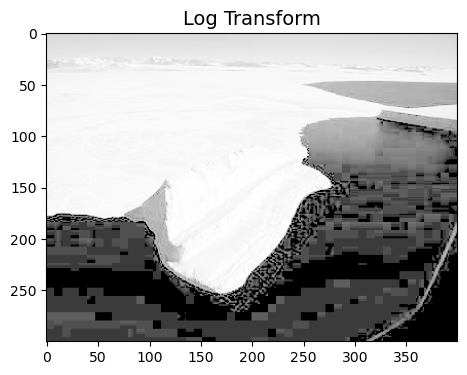

mean(mtrx) = -2.6418166
std(mtrx) = 2.5803103


In [29]:
'''Other Mathematical Operations on a Matrix'''

log_mtrx = np.log(mtrx + .001)  # natural log element-by-element

plt.figure(5)
plt.imshow(log_mtrx, cmap='gray')
plt.title('Log Transform', fontsize=14)
plt.show()

mtrx_mean = log_mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = log_mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

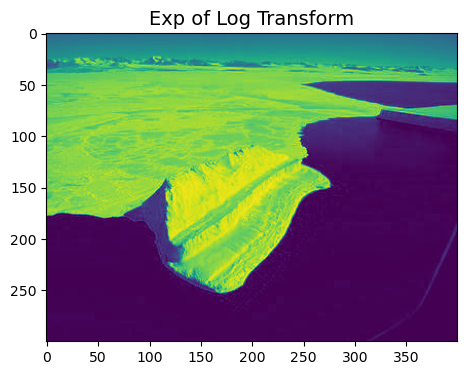

mean(mtrx) = 0.38694212
std(mtrx) = 0.37984067


In [30]:
'''Other Mathematical Operations on a Matrix'''

exp_mtrx = np.exp(log_mtrx)     # exponential

plt.figure(6)
plt.imshow(exp_mtrx)
plt.title('Exp of Log Transform', fontsize=14)
plt.show()

mtrx_mean = exp_mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = exp_mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

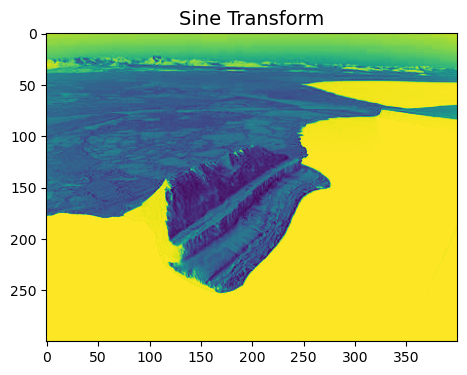

mean(mtrx) = 0.86122394
std(mtrx) = 0.1534877


In [31]:
'''Other Mathematical Operations on a Matrix'''

sin_mtrx = np.sin(mtrx + np.pi/2)  # sine

plt.figure(7)
plt.imshow(sin_mtrx)
plt.title('Sine Transform', fontsize=14)
plt.show()

mtrx_mean = sin_mtrx.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = sin_mtrx.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

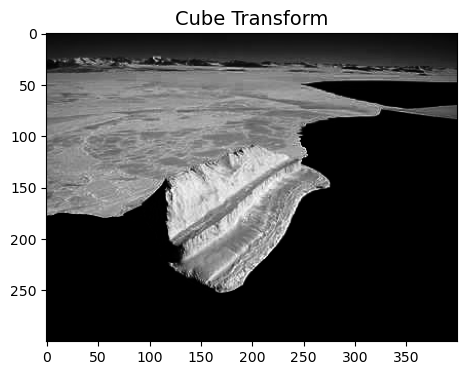

mean(mtrx) = 0.2348578
std(mtrx) = 0.28249925


In [32]:
'''Other Mathematical Operations on a Matrix'''

mtrx_cubed = mtrx**3  # powers

plt.figure(8)
plt.imshow(mtrx_cubed, cmap='gray')
plt.title('Cube Transform', fontsize=14)
plt.show()

mtrx_mean = mtrx_cubed.mean()         # arithmetic mean
print('mean(mtrx) =', mtrx_mean)

mtrx_std = mtrx_cubed.std()           # standard deviation
print('std(mtrx) =', mtrx_std)

#### [Transposition](#toc)<a id="mattransp"></a>

In [33]:
'''Matrix Transposition'''
'''clockwise rotation followed by horizontal right to left flip'''

mtrx = np.random.random((5,7))

np.set_printoptions(precision=3,threshold=20,edgeitems=12,linewidth=100) # one way to control printing of numpy arrays

print('mtrx =\n',mtrx)

mtrx_T = mtrx.transpose()       # transpose of a mtrx: M[i,j] -> M[j,i]

print('mtrx^T =\n', mtrx_T)

mtrx =
 [[0.168 0.732 0.835 0.723 0.27  0.717 0.053]
 [0.719 0.492 0.846 0.014 0.28  0.402 0.19 ]
 [0.433 0.247 0.251 0.993 0.474 0.071 0.491]
 [0.816 0.058 0.826 0.519 0.442 0.857 0.48 ]
 [0.881 0.621 0.97  0.798 0.36  0.926 0.544]]
mtrx^T =
 [[0.168 0.719 0.433 0.816 0.881]
 [0.732 0.492 0.247 0.058 0.621]
 [0.835 0.846 0.251 0.826 0.97 ]
 [0.723 0.014 0.993 0.519 0.798]
 [0.27  0.28  0.474 0.442 0.36 ]
 [0.717 0.402 0.071 0.857 0.926]
 [0.053 0.19  0.491 0.48  0.544]]


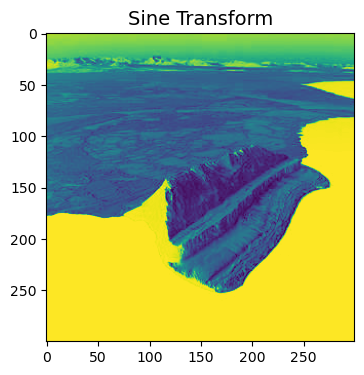

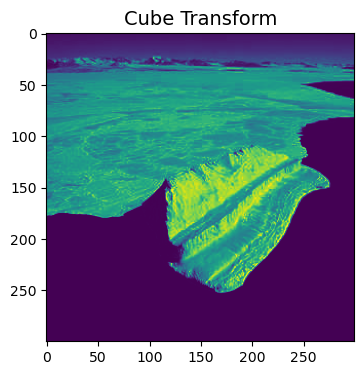

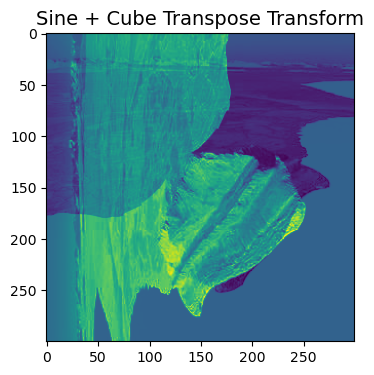

In [34]:
'''Matrix Transposition'''
'''Example of adding a transformed matrix to another transform transposed'''

'''note: to add a matrix to its transpose, a matrix must be square'''

n_rows = block.shape[0]
n_columns = n_rows

mtrx = np.copy(block[:n_rows,:n_columns,0])   # select a square block; red channel

sin_mtrx = np.sin(mtrx + np.pi/2)  # sine

sin_mtrx /= sin_mtrx.max()
plt.figure(9)
plt.imshow(sin_mtrx)
plt.title('Sine Transform', fontsize=14)
plt.show()

mtrx_cubed = mtrx**3                # powers

plt.figure(10)
plt.imshow(mtrx_cubed)
plt.title('Cube Transform', fontsize=14)
plt.show()

plt.figure(11)
plt.imshow(sin_mtrx + mtrx_cubed.transpose())    # sine + cubed transposed
plt.title('Sine + Cube Transpose Transform', fontsize=14)
plt.show()

#### [Element-by-element search](#toc)<a id="matsearch"></a>

In [35]:
'''Searching a matrix for entries matching a test'''

# what are the indices of the values in "mtrx" that satisfy: mtrx >= 0.3
(idx_ids, jdx_ids) = np.where(mtrx >= 0.3) 

np.set_printoptions(precision=3, threshold=20, edgeitems=5, linewidth=100) 

print('matrix =\n', mtrx)
print('ith indices = ',idx_ids)
print('jth indices = ',jdx_ids)

matrix =
 [[0.329 0.329 0.329 0.329 0.329 ... 0.384 0.384 0.384 0.384 0.384]
 [0.329 0.329 0.329 0.329 0.329 ... 0.388 0.388 0.388 0.388 0.388]
 [0.345 0.345 0.345 0.345 0.345 ... 0.392 0.392 0.392 0.392 0.392]
 [0.357 0.357 0.357 0.357 0.357 ... 0.4   0.4   0.4   0.4   0.4  ]
 [0.361 0.361 0.361 0.361 0.361 ... 0.408 0.408 0.408 0.408 0.408]
 ...
 [0.004 0.004 0.004 0.004 0.004 ... 0.004 0.004 0.004 0.004 0.004]
 [0.004 0.004 0.004 0.004 0.004 ... 0.012 0.    0.    0.    0.   ]
 [0.004 0.004 0.004 0.004 0.004 ... 0.012 0.    0.    0.    0.   ]
 [0.004 0.004 0.004 0.004 0.004 ... 0.012 0.    0.    0.    0.   ]
 [0.004 0.004 0.004 0.004 0.004 ... 0.012 0.    0.    0.    0.   ]]
ith indices =  [  0   0   0   0   0 ... 252 252 252 252 252]
jth indices =  [  0   1   2   3   4 ... 171 172 173 174 175]


In [36]:
'''Verify the searched elements'''

mtrx[idx_ids, jdx_ids].min()

0.3019608

In [37]:
mtrx[idx_ids, jdx_ids].shape

(54533,)

In [38]:
mtrx[idx_ids, jdx_ids].dtype

dtype('float32')